<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0'

In [ ]:
os.listdir(base_path)

['data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n250.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n20.csv']

In [ ]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.467599,33.576212,58.009104,48.671224,0.517588,234.241727,233.602383,0.639344
1,0.0,1.0,68.707329,28.282955,41.937778,71.282227,2.155282,222.365571,219.962876,2.402695
2,0.0,2.0,73.308106,75.152144,42.500237,38.568033,0.001687,239.530206,239.412501,0.117704
3,0.0,3.0,64.897694,49.324909,31.792085,88.241436,-0.324491,243.931633,244.017086,-0.085453
4,0.0,4.0,89.685335,33.356685,99.803392,27.783140,-0.885909,259.742642,260.671965,-0.929323
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.309480,29.011731,45.008482,75.619558,-0.159051,227.790201,228.014656,-0.224455
59996,999.0,56.0,59.514732,80.718626,45.618491,60.390667,1.479323,257.721840,256.549699,1.172141
59997,999.0,57.0,50.910257,97.344643,30.541870,25.415256,-0.408655,213.803371,214.667983,-0.864612
59998,999.0,58.0,47.270588,26.676707,33.128456,22.389405,1.710390,141.175546,139.557136,1.618409


In [ ]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.467599,33.576212,58.009104,48.671224,0.517588,234.241727,233.602383,0.639344
1,0.0,1.0,68.707329,28.282955,41.937778,71.282227,2.155282,222.365571,219.962876,2.402695
2,0.0,2.0,73.308106,75.152144,42.500237,38.568033,0.001687,239.530206,239.412501,0.117704
3,0.0,3.0,64.897694,49.324909,31.792085,88.241436,-0.324491,243.931633,244.017086,-0.085453
4,0.0,4.0,89.685335,33.356685,99.803392,27.783140,-0.885909,259.742642,260.671965,-0.929323
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.309480,29.011731,45.008482,75.619558,-0.159051,227.790201,228.014656,-0.224455
59996,999.0,56.0,59.514732,80.718626,45.618491,60.390667,1.479323,257.721840,256.549699,1.172141
59997,999.0,57.0,50.910257,97.344643,30.541870,25.415256,-0.408655,213.803371,214.667983,-0.864612
59998,999.0,58.0,47.270588,26.676707,33.128456,22.389405,1.710390,141.175546,139.557136,1.618409


In [ ]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.467599  33.576212  58.009104  48.671224  0.517588  234.241727   
      1.0    68.707329  28.282955  41.937778  71.282227  2.155282  222.365571   
      2.0    73.308106  75.152144  42.500237  38.568033  0.001687  239.530206   
      3.0    64.897694  49.324909  31.792085  88.241436 -0.324491  243.931633   
      4.0    89.685335  33.356685  99.803392  27.783140 -0.885909  259.742642   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   68.309480  29.011731  45.008482  75.619558 -0.159051  227.790201   
      56.0   59.514732  80.718626  45.618491  60.390667  1.479323  257.721840   
      57.0   50.910257  97.344643  30.541870  25.415256 -0.408655  213.803371   
      58.0   47.270588  26.676707  33.128456  22.389405  1.710390  141.175546   
      59.0   39.741367  59.072117  51.116403  54.661013 -0.017651  214.573248   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    233.602383  0.639344  
      1.0    219.962876  2.402695  
      2.0    239.412501  0.117704  
      3.0    244.017086 -0.085453  
      4.0    260.671965 -0.929323  
...                 ...       ...  
999.0 55.0   228.014656 -0.224455  
      56.0   256.549699  1.172141  
      57.0   214.667983 -0.864612  
      58.0   139.557136  1.618409  
      59.0   214.782796 -0.209548  

[60000 rows x 8 columns]

In [ ]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.467599  33.576212  58.009104  48.671224  0.517588  234.241727   
      1.0    68.707329  28.282955  41.937778  71.282227  2.155282  222.365571   
      2.0    73.308106  75.152144  42.500237  38.568033  0.001687  239.530206   
      3.0    64.897694  49.324909  31.792085  88.241436 -0.324491  243.931633   
      4.0    89.685335  33.356685  99.803392  27.783140 -0.885909  259.742642   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   68.309480  29.011731  45.008482  75.619558 -0.159051  227.790201   
      56.0   59.514732  80.718626  45.618491  60.390667  1.479323  257.721840   
      57.0   50.910257  97.344643  30.541870  25.415256 -0.408655  213.803371   
      58.0   47.270588  26.676707  33.128456  22.389405  1.710390  141.175546   
      59.0   39.741367  59.072117  51.116403  54.661013 -0.017651  214.573248   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    233.602383  0.639344  
      1.0    219.962876  2.402695  
      2.0    239.412501  0.117704  
      3.0    244.017086 -0.085453  
      4.0    260.671965 -0.929323  
...                 ...       ...  
999.0 55.0   228.014656 -0.224455  
      56.0   256.549699  1.172141  
      57.0   214.667983 -0.864612  
      58.0   139.557136  1.618409  
      59.0   214.782796 -0.209548  

[60000 rows x 8 columns]

In [ ]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.467599,33.576212,58.009104,48.671224,0.517588,234.241727,233.602383,0.639344
1,0.0,1.0,68.707329,28.282955,41.937778,71.282227,2.155282,222.365571,219.962876,2.402695
2,0.0,2.0,73.308106,75.152144,42.500237,38.568033,0.001687,239.530206,239.412501,0.117704
3,0.0,3.0,64.897694,49.324909,31.792085,88.241436,-0.324491,243.931633,244.017086,-0.085453
4,0.0,4.0,89.685335,33.356685,99.803392,27.783140,-0.885909,259.742642,260.671965,-0.929323
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.309480,29.011731,45.008482,75.619558,-0.159051,227.790201,228.014656,-0.224455
59996,999.0,56.0,59.514732,80.718626,45.618491,60.390667,1.479323,257.721840,256.549699,1.172141
59997,999.0,57.0,50.910257,97.344643,30.541870,25.415256,-0.408655,213.803371,214.667983,-0.864612
59998,999.0,58.0,47.270588,26.676707,33.128456,22.389405,1.710390,141.175546,139.557136,1.618409


In [ ]:
table.set_index(['rep', 'index'], inplace=True)

In [ ]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.467599  33.576212  58.009104  48.671224  0.517588  234.241727   
      1.0    68.707329  28.282955  41.937778  71.282227  2.155282  222.365571   
      2.0    73.308106  75.152144  42.500237  38.568033  0.001687  239.530206   
      3.0    64.897694  49.324909  31.792085  88.241436 -0.324491  243.931633   
      4.0    89.685335  33.356685  99.803392  27.783140 -0.885909  259.742642   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   68.309480  29.011731  45.008482  75.619558 -0.159051  227.790201   
      56.0   59.514732  80.718626  45.618491  60.390667  1.479323  257.721840   
      57.0   50.910257  97.344643  30.541870  25.415256 -0.408655  213.803371   
      58.0   47.270588  26.676707  33.128456  22.389405  1.710390  141.175546   
      59.0   39.741367  59.072117  51.116403  54.661013 -0.017651  214.573248   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    233.602383  0.639344  
      1.0    219.962876  2.402695  
      2.0    239.412501  0.117704  
      3.0    244.017086 -0.085453  
      4.0    260.671965 -0.929323  
...                 ...       ...  
999.0 55.0   228.014656 -0.224455  
      56.0   256.549699  1.172141  
      57.0   214.667983 -0.864612  
      58.0   139.557136  1.618409  
      59.0   214.782796 -0.209548  

[60000 rows x 8 columns]

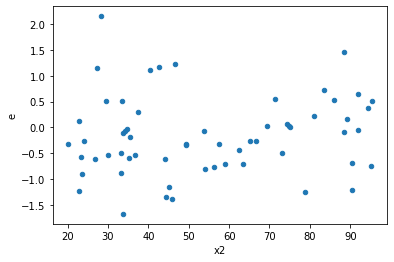

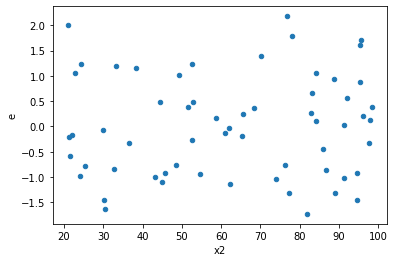

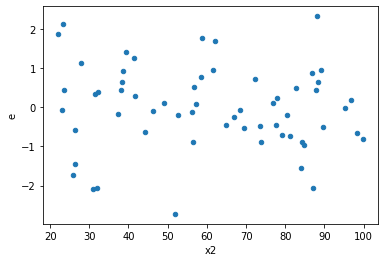

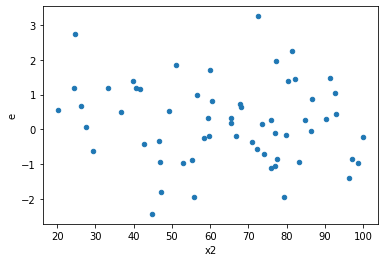

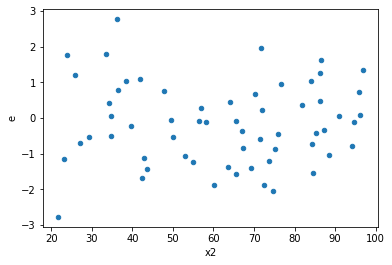

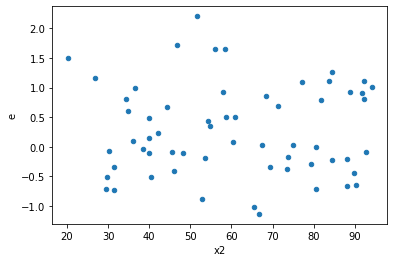

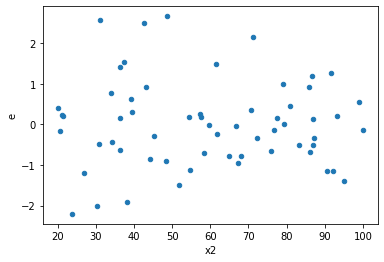

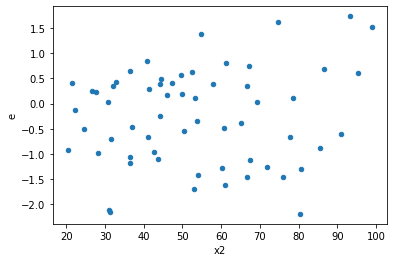

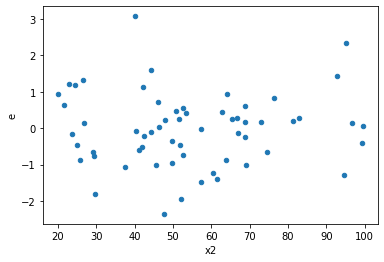

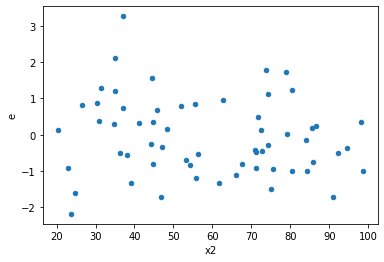

In [ ]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [ ]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,22.0,22.0,8955.843710616027,9996.982617922757,407.0838050280012,454.4083008146708,1.1162524649768721,0.7987676713698604,0.6006161643150698,0.3993838356849302,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,7182.833131371393,9589.87806081896,326.4924150623361,435.90354821904367,1.335110796175213,0.5034984944602965,0.7482507527698518,0.25174924723014824,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,5835.16323474281,15746.608508659105,265.2346924883096,715.7549322117775,2.6985720664853257,0.02397343144912023,0.9880132842754399,0.011986715724560115,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,10624.572282220422,17525.43551620817,482.9351037372919,796.6107052821895,1.6495191571651242,0.2482633052558625,0.8758683473720688,0.12413165262793124,Reject001=1 : Homoscedasticity
9.0,22.0,22.0,9910.238975750339,12048.731262516378,450.46540798865175,547.6696028416535,1.2157861472360838,0.6507641008064713,0.6746179495967644,0.32538205040323565,Reject001=1 : Homoscedasticity
10.0,22.0,22.0,6982.6755546707545,11763.641519077688,317.3943433941252,534.7109781398949,1.684689690502506,0.22908207705939487,0.8854589614703026,0.11454103852969744,Reject001=1 : Homoscedasticity
11.0,22.0,22.0,8373.818829823349,10057.023215667607,380.628128628334,457.1374188939821,1.2010079773698383,0.6712695633645342,0.6643652183177329,0.3356347816822671,Reject001=1 : Homoscedasticity
12.0,22.0,22.0,6421.250566010283,9142.927247348547,291.87502572774014,415.58760215220667,1.423854614200069,0.4137753709141778,0.7931123145429111,0.2068876854570889,Reject001=1 : Homoscedasticity
14.0,22.0,22.0,9205.581741926822,9484.883969604112,418.4355337239465,431.13108952745966,1.0303405298554036,0.9447478719949536,0.5276260640025232,0.4723739359974768,Reject001=1 : Homoscedasticity


In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,12140.3074826755,9698.140575303316,551.8321583034318,440.8245716046962,0.7988381339717127,0.6028980586986377,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,8955.843710616027,9996.982617922757,407.0838050280012,454.4083008146708,1.1162524649768721,0.7987676713698604,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,7182.833131371393,9589.87806081896,326.4924150623361,435.90354821904367,1.335110796175213,0.5034984944602965,Reject001=1 : Homoscedasticity
3.0,22.0,22.0,12014.641360638458,8570.756690558483,546.1200618472026,389.5798495708401,0.7133593449270493,0.434587819629473,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,16467.764005669123,9316.099549777164,748.5347275304147,423.4590704444165,0.565717333972605,0.18944813801254207,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,11951.355346551323,8300.825540632452,543.243424843242,377.3102518469296,0.6945509776870397,0.39931018996159273,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,12261.854381192723,6682.678432749684,557.3570173269419,303.7581105795311,0.5449973735619957,0.16243142132420582,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,5835.16323474281,15746.608508659105,265.2346924883096,715.7549322117775,2.6985720664853257,0.02397343144912023,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,10624.572282220422,17525.43551620817,482.9351037372919,796.6107052821895,1.6495191571651242,0.2482633052558625,Reject001=1 : Homoscedasticity


In [ ]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      987
Reject001=0 : Heteroscedasticity     13
Name: Result_test, dtype: int64